### **Importing Necessary Modules**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

### **Load Bangle Data**

In [108]:
bangle_data = pd.read_csv("HRV-data/bangle.csv")
print(bangle_data.head())

    timestamp_ms  value
0  1724074011462   4334
1  1724074011481   4286
2  1724074011501   4222
3  1724074011520   4174
4  1724074011540   4094


### **Plot Unfiltered Bangle Data**

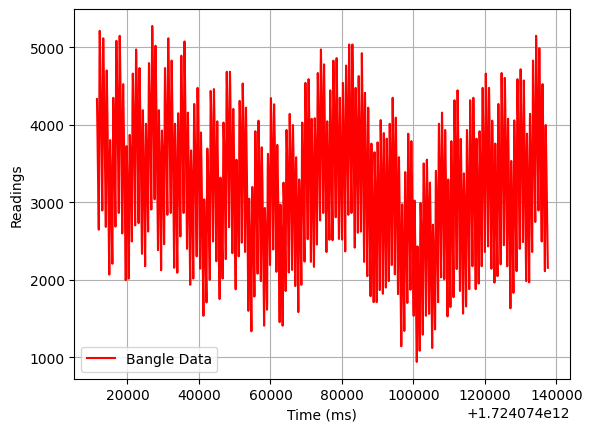

In [109]:
x_axis = bangle_data["timestamp_ms"]
y_axis = bangle_data["value"]

plt.plot(x_axis, y_axis, c='r', label="Bangle Data")
plt.legend()
plt.grid(True, 'both', 'both')
plt.xlabel("Time (ms)")
plt.ylabel("Readings")
plt.show()

### **Estimating PPG Sampling Rate For Filter Design**
- _Higher sampling rate means more data points are captured, allowing for higher resolution of data, and greater analysis of physiological parameters_
- _Sampling frequency simply means how many samples per second_
- _Knowing the sampling frequency, tells us the time resolution of the PPG signal_
- _Suppose a sampling frequency of 25 Hz would mean one reading every 0.04 seconds_
- _How many times per second a signal is snapshot/captured_

### **Formulas**

**Given timestamps \(t_0, t_1, \dots, t_{N-1}\) in milliseconds:**

1. **Inter-sample intervals** (in seconds):

$$
\Delta t_i = \frac{t_{i+1} - t_i}{1000}, \quad
i = 0,1,\dots,N-2
$$

2. **Mean sampling interval**:

$$
\overline{\Delta t} = \frac{1}{N-1} \sum_{i=0}^{N-2} \Delta t_i
$$

3. **Sampling frequency** (Hz):

$$
f_s = \frac{1}{\overline{\Delta t}}
$$

In [110]:
timestamps = bangle_data["timestamp_ms"].to_numpy()
dt = np.diff(timestamps) / 1000.0
fs = 1 / np.mean(dt)
print(f"Estimated PPG sampling rate: {fs:.1f} Hz")

Estimated PPG sampling rate: 43.9 Hz


### **Finding Peaks In Unfiltered PPG Data**

In [111]:
min_dist = int(0.5 * fs) # the standard formula
ppg = y_axis.to_numpy()
peaks, props = find_peaks(ppg, distance=min_dist, height=np.mean(ppg))

### **Plotting Peaks In Unfiltered PPG Data**

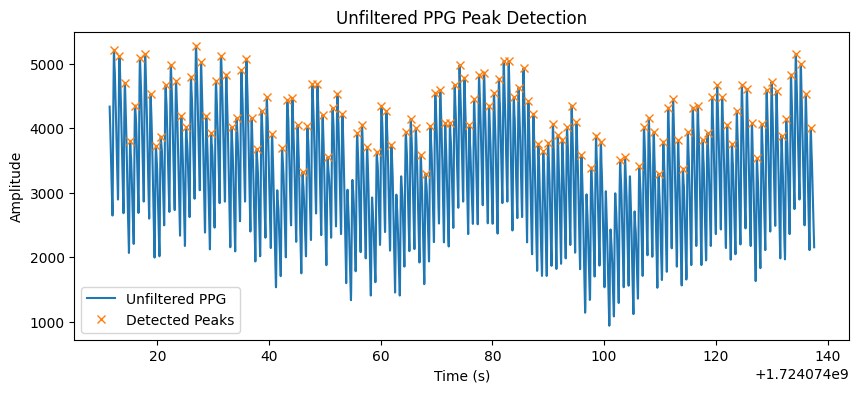

In [112]:
plt.figure(figsize=(10,4))
t_sec = timestamps / 1000.0
plt.plot(t_sec, ppg, label="Unfiltered PPG")
plt.plot(t_sec[peaks], ppg[peaks], 'x', label="Detected Peaks")
plt.title("Unfiltered PPG Peak Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### **Number Of Peaks Detected in the Unfiltered PPG Data**

In [113]:
print(f"Detected {len(peaks)} peaks in the Unfiltered PPG")

Detected 130 peaks in the Unfiltered PPG


### **Creating a Band-pass Filter for Filtering PPG Data**
- _Blocking out frequencies below 0.5 Hz, as that falls under baseline drift (the value a signal exhibits, when no significant change or event is present, essentially the "resting state" of a signal)_
- _Blocking out frequencies above 8 Hz, as those fall under the category of non-cardiac signals or **HIGH FREQUENCY NOISE**_
- _Designing a 3rd order butterworth bandpass filter for pass-band of [0.5, 8]_

In [114]:
lowcut, highcut = 0.5, 8.0
nyq = 0.5 * fs
b, a = butter(3, [lowcut/nyq, highcut/nyq], btype='band')  # Getting numerator b, and denominator a polynomials for the 3rd order IIR filter

### **Filtering the PPG Data**

In [115]:
ppg = bangle_data["value"].to_numpy()  # The raw PPG amplitude vector
'filtfilt() applies zero-phase filtering, allowing us to keep the peaks aligned with the raw signal'
ppg_filt = filtfilt(b, a, ppg)  # filtering the raw PPG according to the coefficients from the Butterworth band-pass filter

### **Plotting Filtered PPG Data**

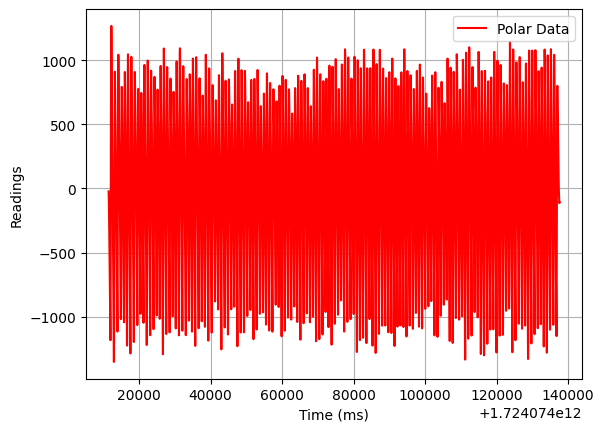

In [116]:
plt.plot(x_axis, ppg_filt, c='r', label="Polar Data")
plt.legend()
plt.grid(True, 'both', 'both')
plt.xlabel("Time (ms)")
plt.ylabel("Readings")
plt.show()

### **Finding Peaks In Filtered PPG Data**

In [117]:
min_dist = int(0.5 * fs) # the standard formula
peaks, props = find_peaks(ppg_filt, distance=min_dist, height=np.mean(ppg_filt))

### **Plotting Peaks In Filtered PPG Data**

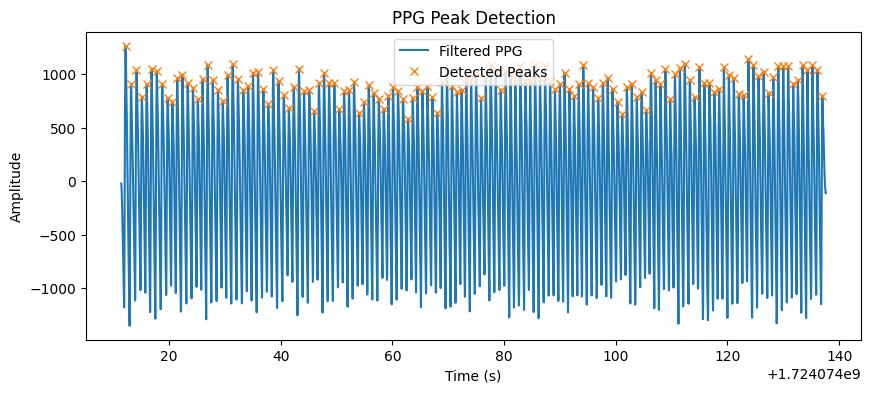

In [118]:
plt.figure(figsize=(10,4))
t_sec = timestamps / 1000.0
plt.plot(t_sec, ppg_filt, label="Filtered PPG")
plt.plot(t_sec[peaks], ppg_filt[peaks], 'x', label="Detected Peaks")
plt.title("PPG Peak Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### **Number Of Peaks Detected in the Filtered PPG Data**

In [119]:
print(f"Detected {len(peaks)} peaks in the Filtered PPG")

Detected 142 peaks in the Filtered PPG
